**Final results asked by Erdahl Tue 19 Feb**

**Patch Version - to deal with the flipped RNA issue**

This file does analysis which is complementary to Ted's original analysis on WGS, Protein and RNA data.
Combinations of the following are explored.
* Random Forest
* with/without ATRX
* W + P + R + C + combined
* ATRX/DAXX/TERT

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralBiclustering
import numpy as np

In [2]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))

In [3]:
labels = {0:'W', 1:'M', 2:'T'}

In [4]:
topN = 30

# W only

## RF

In [111]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))

In [112]:
X = W.drop(['West'], axis=1)
y = W['West']

### with ATRX

In [113]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=12)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.6176470588235294

In [114]:
feature_importances.to_csv('./simon_results/feature_importance/W_with_ATRX_RF_all_genes.csv',index_label='Gene')

In [115]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


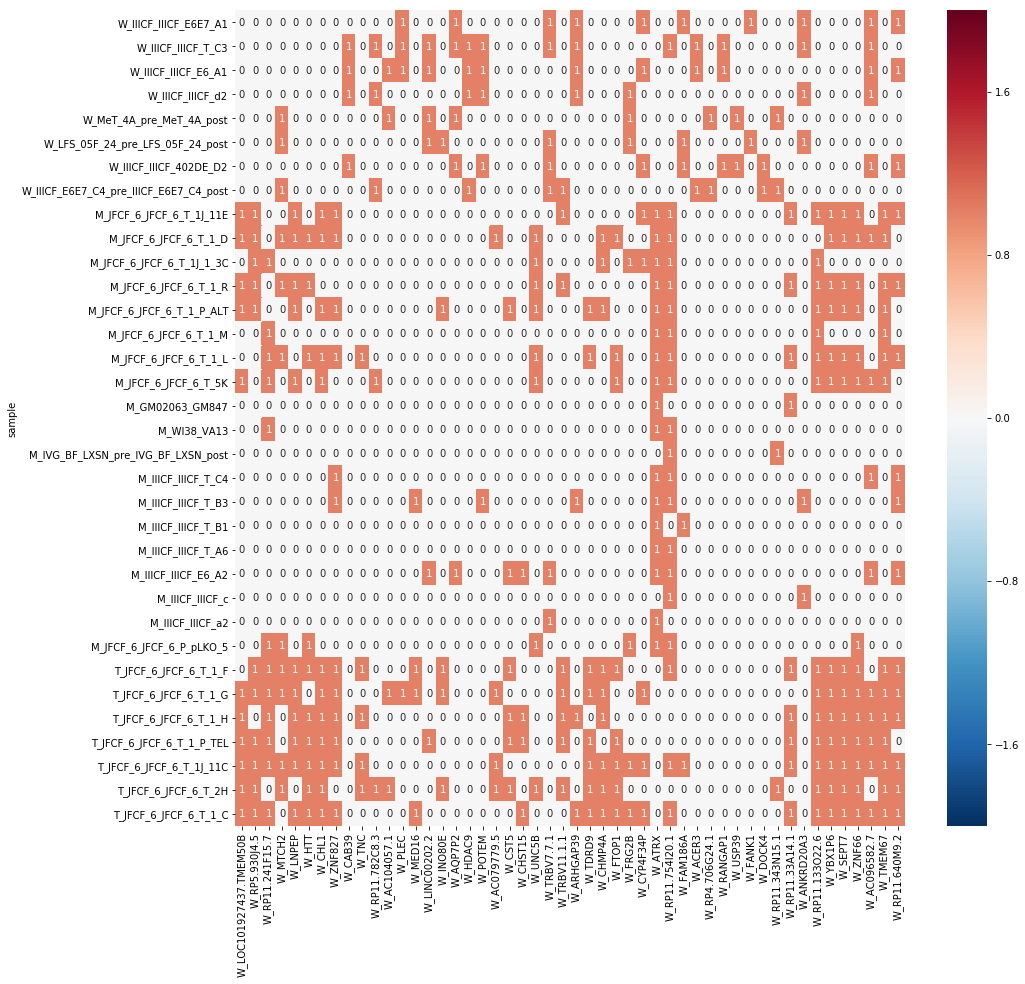

In [116]:
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=10).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [117]:
fit_data.to_excel('./simon_results/excel/W_with_ATRX_RF_'+str(topN)+'.xlsx', 'W_with_ATRX_RF_'+str(topN))

### No ATRX

In [118]:
X = X.drop(['W_ATRX'],axis=1)

In [119]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=12)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.5882352941176471

In [120]:
feature_importances.to_csv(
    './simon_results/feature_importance/W_without_ATRX_RF_all_genes.csv',
    index_label='Gene')

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


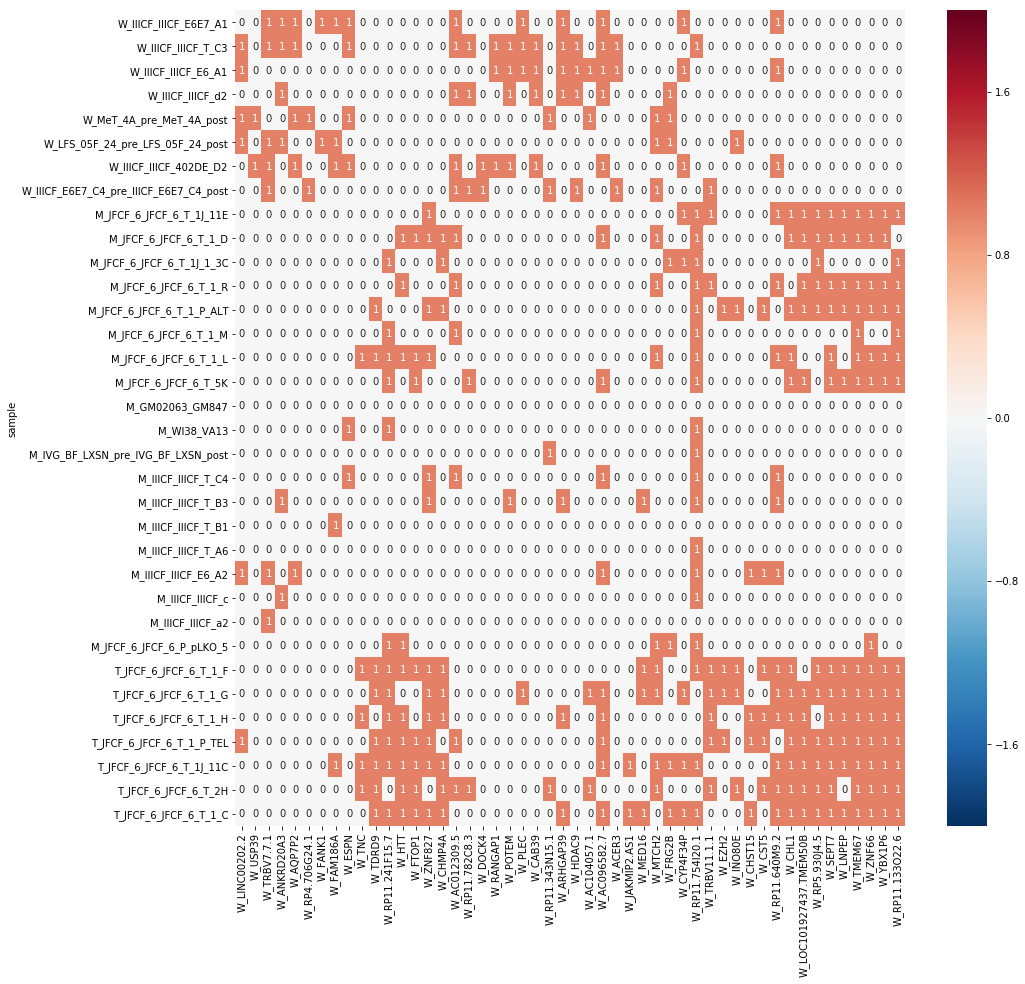

In [121]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=6, method='log').fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [122]:
fit_data.to_excel('./simon_results/excel/W_without_ATRX_RF_'+str(topN)+'.xlsx', 'W_without_ATRX_RF_'+str(topN))

# P only

In [123]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))

In [124]:
X = P
y = W['West']

## RF

### with ATRX

In [125]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=12)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.7647058823529411

In [126]:
feature_importances.to_csv(
    './simon_results/feature_importance/P_RF_all_genes.csv',
    index_label='Gene')

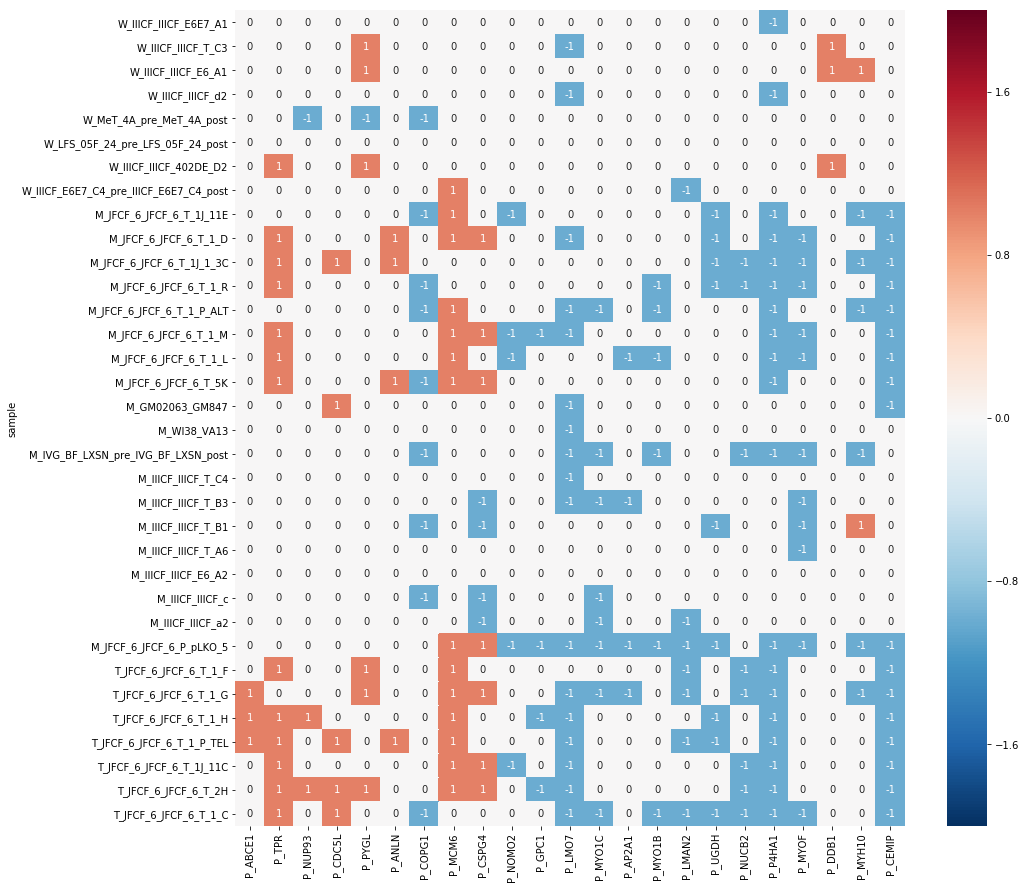

In [127]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [128]:
fit_data.to_excel('./simon_results/excel/P_RF_'+str(topN)+'.xlsx', 'P_RF_'+str(topN))

# R only

In [202]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))

In [172]:
X = R
y = W['West']

## RF

### with ATRX

In [173]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=12)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.7058823529411765

In [174]:
feature_importances.to_csv(
    './simon_results/feature_importance/R_with_ATRX_RF_all_genes.csv',
    index_label='Gene')

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


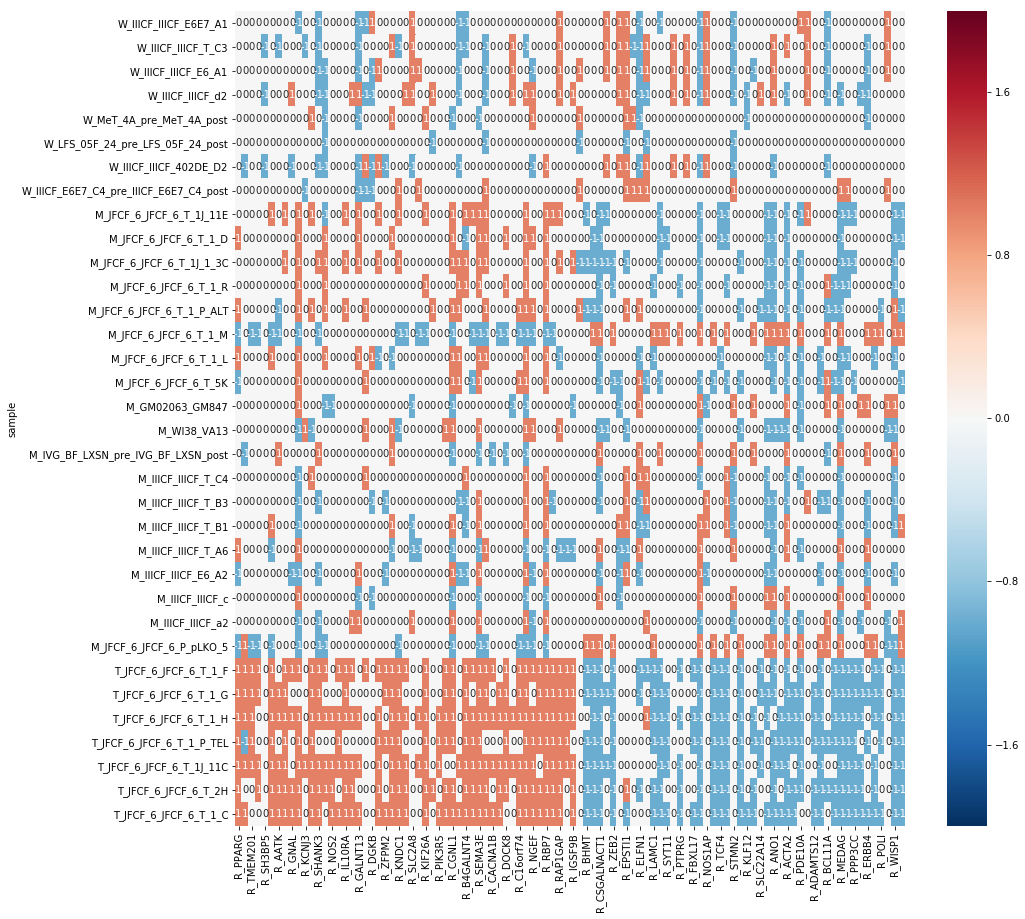

In [175]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [176]:
fit_data.to_excel('./simon_results/excel/R_with_ATRX_RF_'+str(topN)+'.xlsx', 'R_with_ATRX_RF_'+str(topN))

### No ATRX

In [177]:
X = X.drop(['R_ATRX'],axis=1)

In [178]:
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
feature_importances.to_csv(
    './simon_results/feature_importance/R_without_ATRX_RF_all_genes.csv',
    index_label='Gene')
rf.oob_score_

0.6764705882352942

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


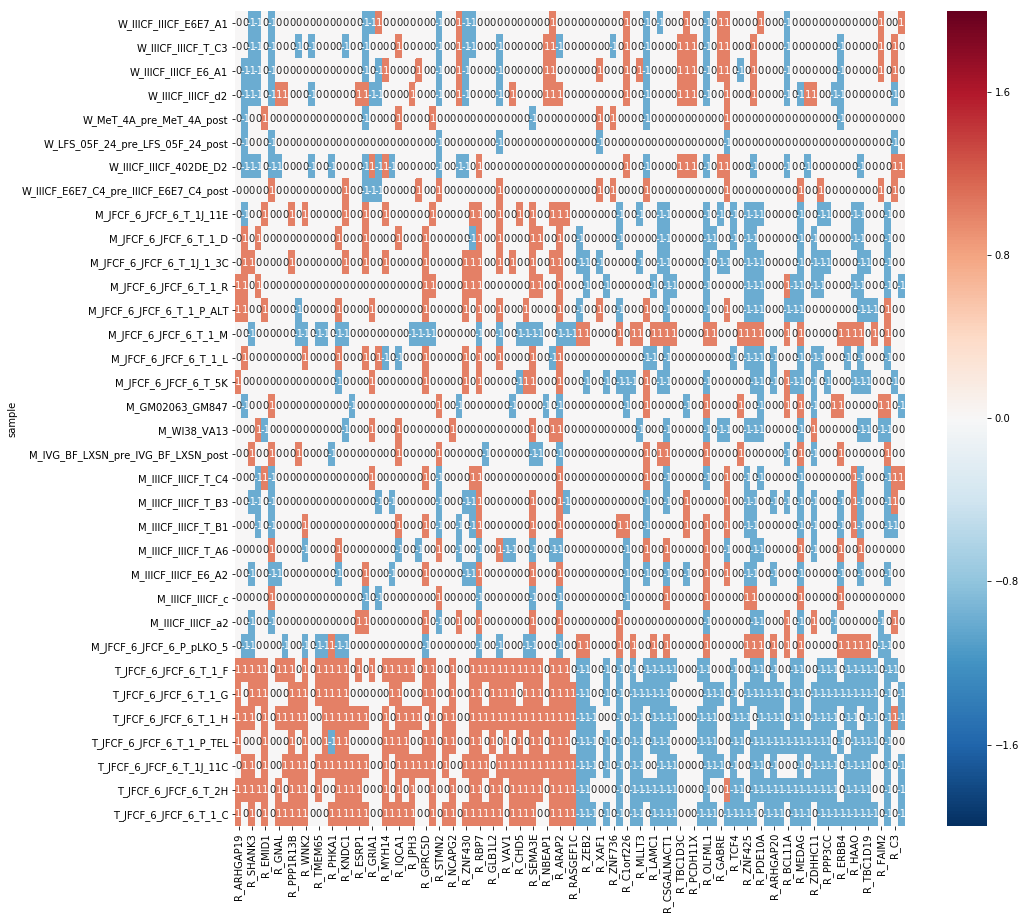

In [179]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [180]:
fit_data.to_excel('./simon_results/excel/R_without_ATRX_RF_'+str(topN)+'.xlsx', 'R_without_ATRX_RF_'+str(topN))

# CNV

In [139]:
C = pd.read_csv('./C_36.csv').set_index(['sample'])

In [140]:
X = C.drop(['y'], axis=1)
y = C['y']

In [141]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=-1)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)

In [142]:
feature_importances.to_csv(
    './simon_results/feature_importance/C_RF_all_genes.csv',
    index_label='Gene')

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


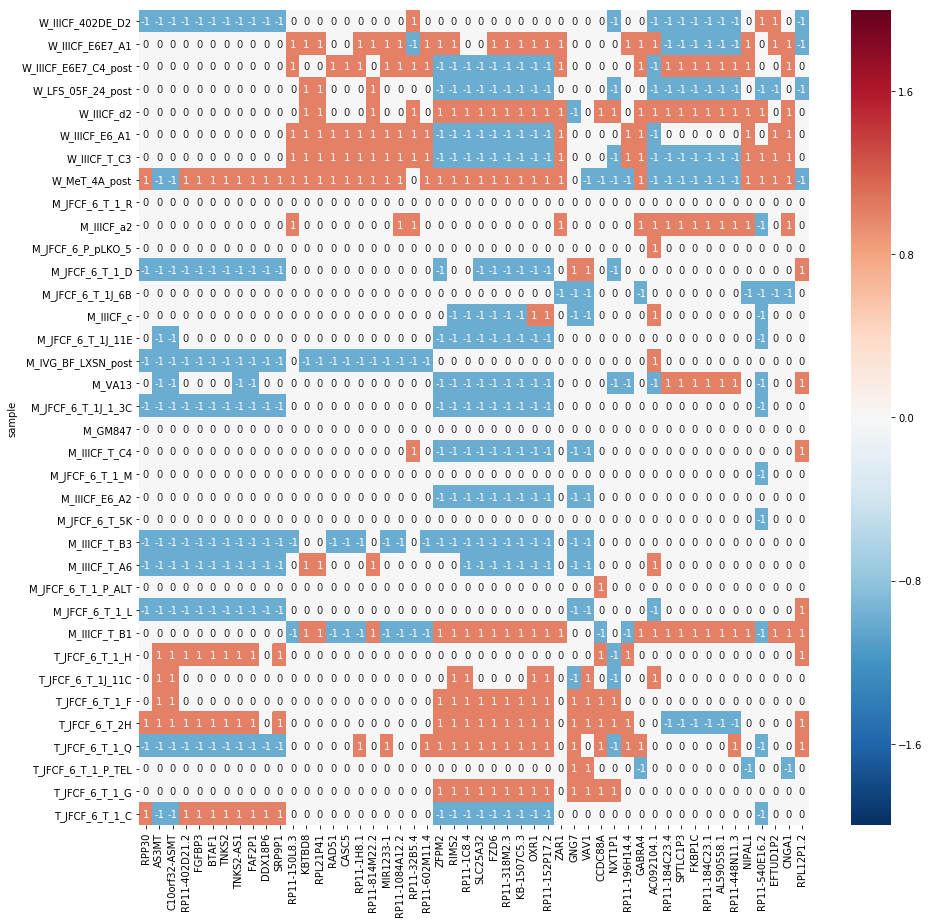

In [143]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['sample'], axis=1)
by_class = by_class.drop(['class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=4).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [144]:
fit_data.to_excel('./simon_results/excel/C_RF_'+str(topN)+'.xlsx', 'C_RF_'+str(topN))

# WRP

In [181]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))

In [182]:
X = W.drop(['West'], axis=1)
y = W['West']
X = pd.concat([X, R], axis=1)
X = pd.concat([X, P], axis=1)

## RF

### with ATRX

In [183]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=12)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.7647058823529411

In [184]:
feature_importances.to_csv(
    './simon_results/feature_importance/WRP_with_ATRX_RF_all_genes.csv',
    index_label='Gene')

In [ ]:
fig = plt.gcf()
fig.set_size_inches(6, 15)
ax = sns.barplot(x='importance', y='index', data=feature_importances.iloc[:topN,:].reset_index())

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


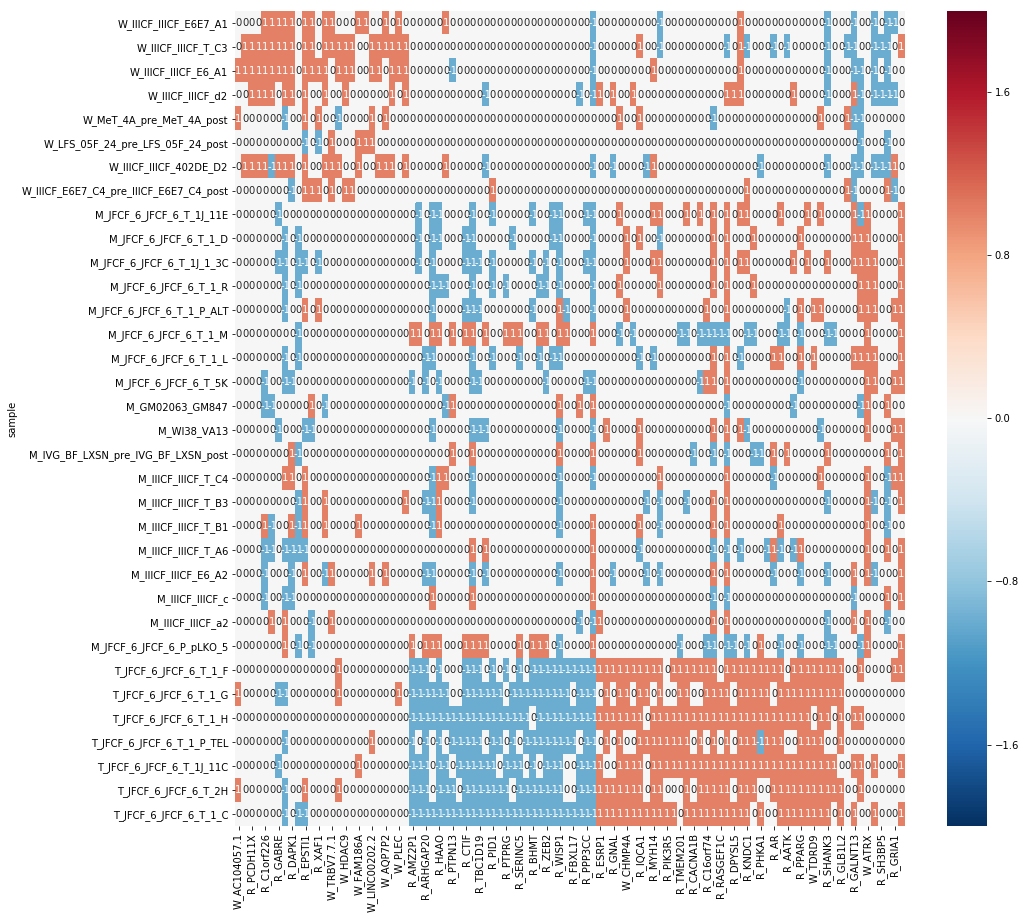

In [185]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=4).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [186]:
fit_data.to_excel('./simon_results/excel/WRP_with_ATRX_RF_'+str(topN)+'.xlsx', 'WRP_with_ATRX_RF_'+str(topN))

### No ATRX

In [187]:
X = X.drop(['W_ATRX'],axis=1)
X = X.drop(['R_ATRX'],axis=1)

In [188]:
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
feature_importances.to_csv(
    './simon_results/feature_importance/WRP_without_ATRX_RF_all_genes.csv',
    index_label='Gene')
rf.oob_score_

0.7647058823529411

In [ ]:
fig = plt.gcf()
fig.set_size_inches(6, 15)
ax = sns.barplot(x='importance', y='index', data=feature_importances.iloc[:topN,:].reset_index())

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


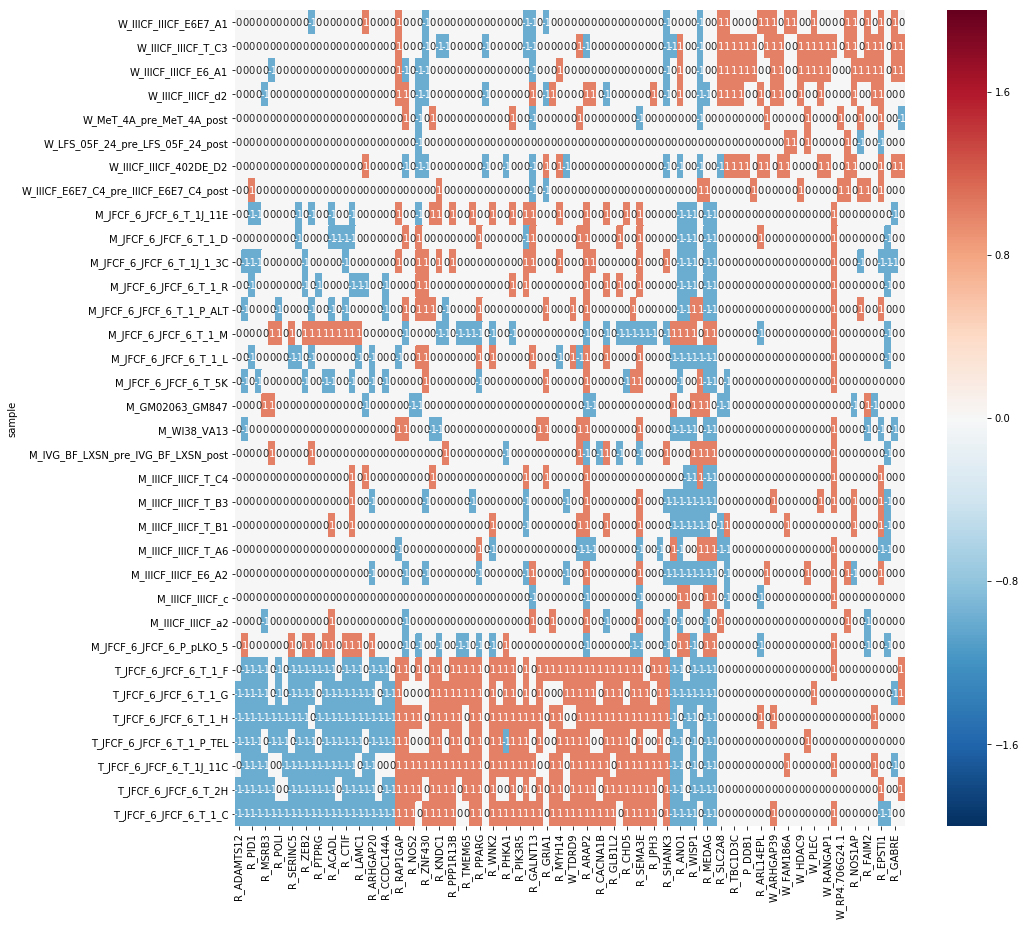

In [189]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['index'], axis=1)
by_class = by_class.drop(['index','class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=4).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [190]:
fit_data.to_excel('./simon_results/excel/WRP_without_ATRX_RF_'+str(topN)+'.xlsx', 'WRP_without_ATRX_RF_'+str(topN))

# WRPC

In [205]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))
C = pd.read_csv('./C.csv').sort_values(['sample']).set_index(['sample'])

In [206]:
C.columns =  ['C_' + str(col) for col in C.columns if str(col) != 'y'] + ['y']

## with ATRX

In [207]:
X = W.drop(['West'], axis=1)
X = pd.concat([X, R], axis=1)
X = pd.concat([X, P], axis=1)
X.index.names = ['sample']
X = pd.merge(X, C, on=['sample'])
y = X['y']
X = X.drop(['y'],axis=1)

In [208]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=-1)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
rf.oob_score_

0.5294117647058824

In [195]:
feature_importances.to_csv(
    './simon_results/feature_importance/WRPC_with_ATRX_RF_all_genes.csv',
    index_label='Gene')

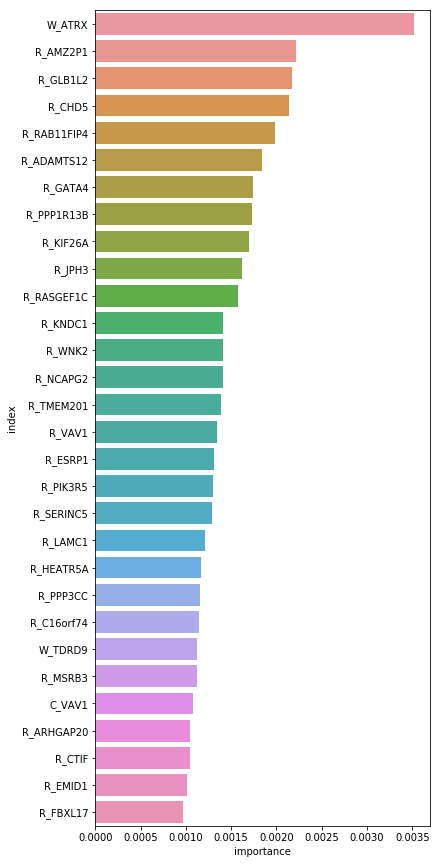

In [221]:
fig = plt.gcf()
fig.set_size_inches(6, 15)
ax = sns.barplot(x='importance', y='index', data=feature_importances.iloc[:topN,:].reset_index())

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


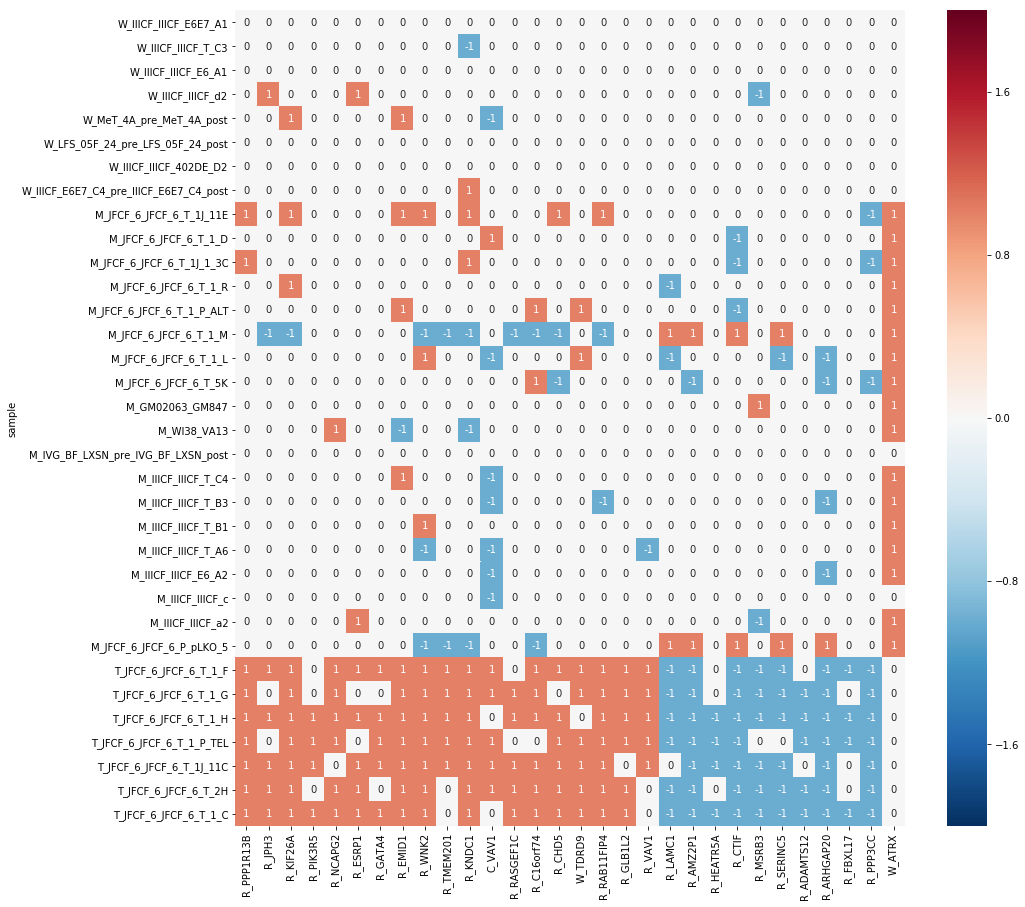

In [211]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['sample'], axis=1)
by_class = by_class.drop(['class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [197]:
fit_data.to_excel('./simon_results/excel/WRPC_with_ATRX_RF_'+str(topN)+'.xlsx', 'WRPC_with_ATRX_RF_'+str(topN))

## No ATRX

In [222]:
X = X.drop(['W_ATRX'],axis=1)
X = X.drop(['R_ATRX'],axis=1)

In [223]:
rf = RandomForestClassifier(n_estimators=5000,oob_score=True, n_jobs=-1)
rf.fit(X, y)
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns,
    columns=['importance']).sort_values(
        'importance', ascending=False)
feature_importances.to_csv(
    './simon_results/feature_importance/WRPC_without_ATRX_RF_all_genes.csv',
    index_label='Gene')
rf.oob_score_

0.5294117647058824

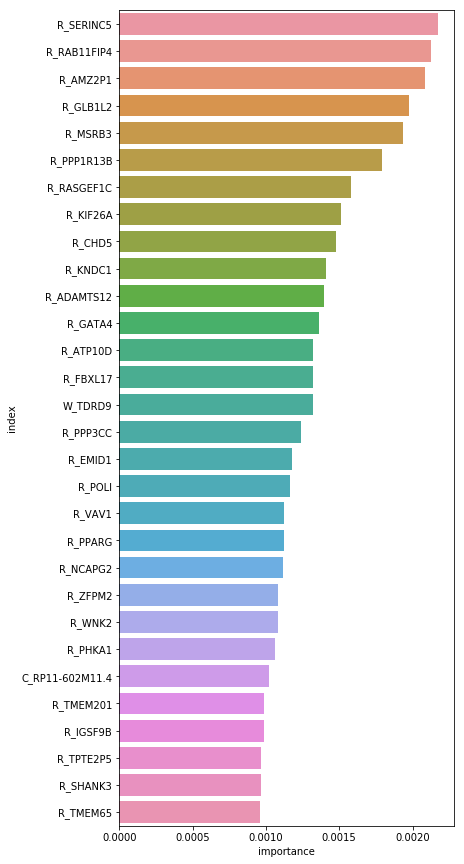

In [224]:
fig = plt.gcf()
fig.set_size_inches(6, 15)
ax = sns.barplot(x='importance', y='index', data=feature_importances.iloc[:topN,:].reset_index())

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


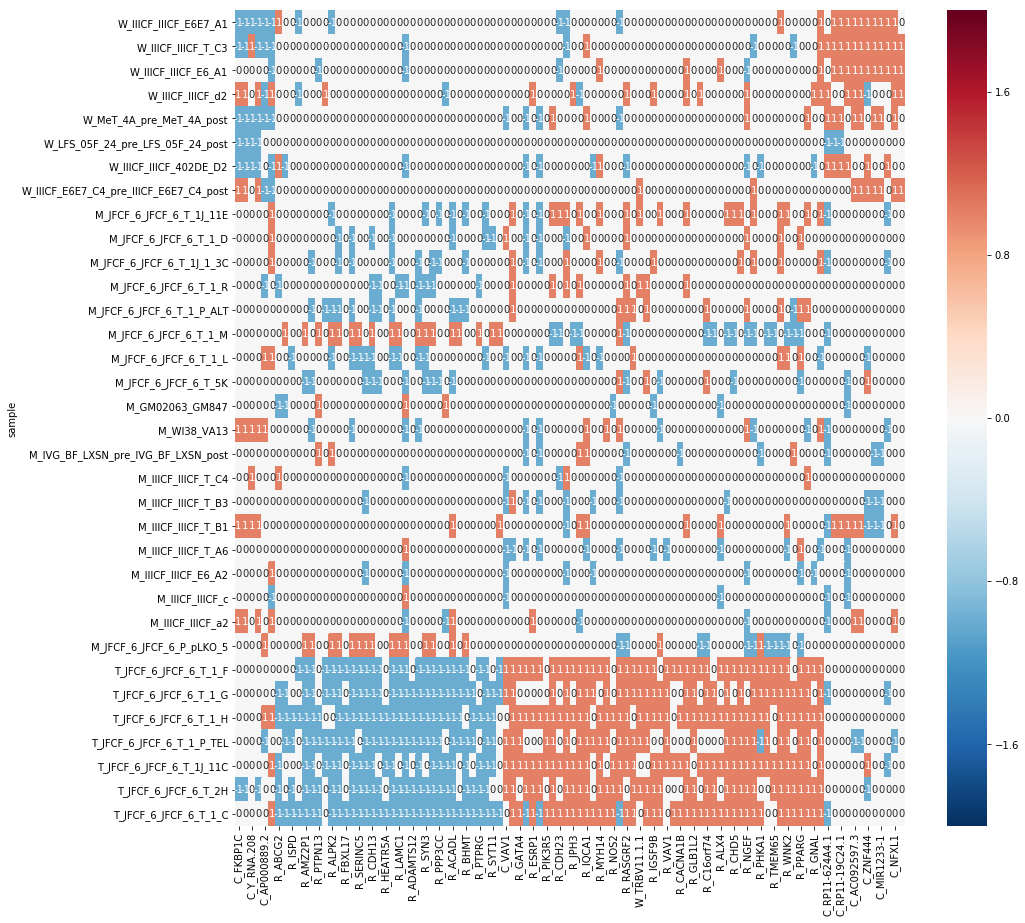

In [200]:
by_class = X[X.columns.intersection(list(feature_importances.iloc[:topN,0].index))]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['sample'], axis=1)
by_class = by_class.drop(['class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=4).fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [201]:
fit_data.to_excel(
    './simon_results/excel/WRPC_without_ATRX_RF_' + str(topN) + '.xlsx',
    'WRPC_without_ATRX_RF_' + str(topN))

# ATRX DAXX TERT

## Direct Investigation

In [85]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))
C = pd.read_csv('./C.csv').sort_values(['sample']).set_index(['sample'])

In [86]:
C.columns =  ['C_' + str(col) for col in C.columns if str(col) != 'y'] + ['y']

In [87]:
gene_list = ['ATRX', 'DAXX', 'TERT']

In [90]:
gene_list_W = ['W_'+str(x) for x in gene_list]
gene_list_P = ['P_'+str(x) for x in gene_list]
gene_list_R = ['R_'+str(x) for x in gene_list]
gene_list_C = ['C_'+str(x) for x in gene_list]
gene_list_all = gene_list_W + gene_list_P + gene_list_R + gene_list_C

In [95]:
X = W.drop(['West'], axis=1)
X = pd.concat([X, R], axis=1)
X = pd.concat([X, P], axis=1)
X.index.names = ['sample']
X = pd.merge(X, C, on=['sample'])
y = X['y']
X = X.drop(['y'],axis=1)

/Users/scai/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


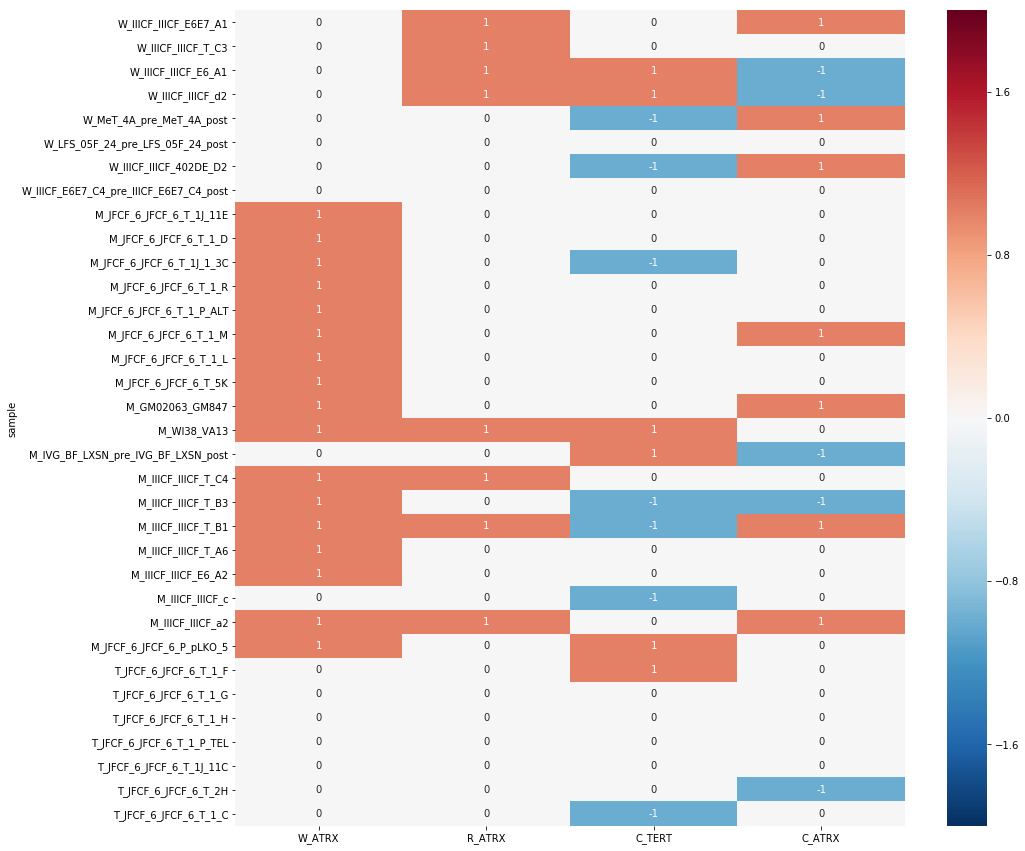

In [96]:
by_class = X[X.columns.intersection(gene_list_all)]
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['sample'], axis=1)
by_class = by_class.drop(['class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2,method='log').fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)

In [103]:
fit_data.to_excel('./simon_results/excel/ATRX_DAXX_TERT.xlsx',
                  'ATRX_DAXX_TERT' + str(topN))

## Epigenetic Investigation

In [44]:
W = pd.read_csv('./W.tsv', sep = '\t')
P = pd.read_csv('./P.tsv', sep = '\t')
R = pd.read_csv('./R.tsv', sep = '\t').applymap(lambda x:-1*int(x))
C = pd.read_csv('./C.csv').sort_values(['sample']).set_index(['sample'])

In [45]:
C.columns =  ['C_' + str(col) for col in C.columns if str(col) != 'y'] + ['y']

In [46]:
gene_list_ATRX = [
    'ASCL1', 'ATF6', 'EGR1', 'ESRRA', 'FOXS1', 'GLI1', 'HAND1', 'HESX1',
    'HOXA2', 'HOXA9', 'HOXD8', 'HSFX1', 'KLF8', 'MYBL1', 'MYOD1', 'SOX7',
    'TBX19', 'TCF7L1', 'THRB', 'ZBTB6', 'ZNF213', 'ZNF280A', 'ZNF287',
    'ZNF561', 'ZNF562', 'ZNF582'
]

In [47]:
X = W.drop(['West'], axis=1)
X = pd.concat([X, R], axis=1)
X = pd.concat([X, P], axis=1)
X.index.names = ['sample']
X = pd.merge(X, C, on=['sample'])
y = X['y']
X = X.drop(['y'],axis=1)

In [48]:
df_list = []
for gene in gene_list_ATRX:
    df_list.append(X.filter(regex='.*'+ gene+'.*', axis=1))
df = pd.concat(df_list, axis=1)

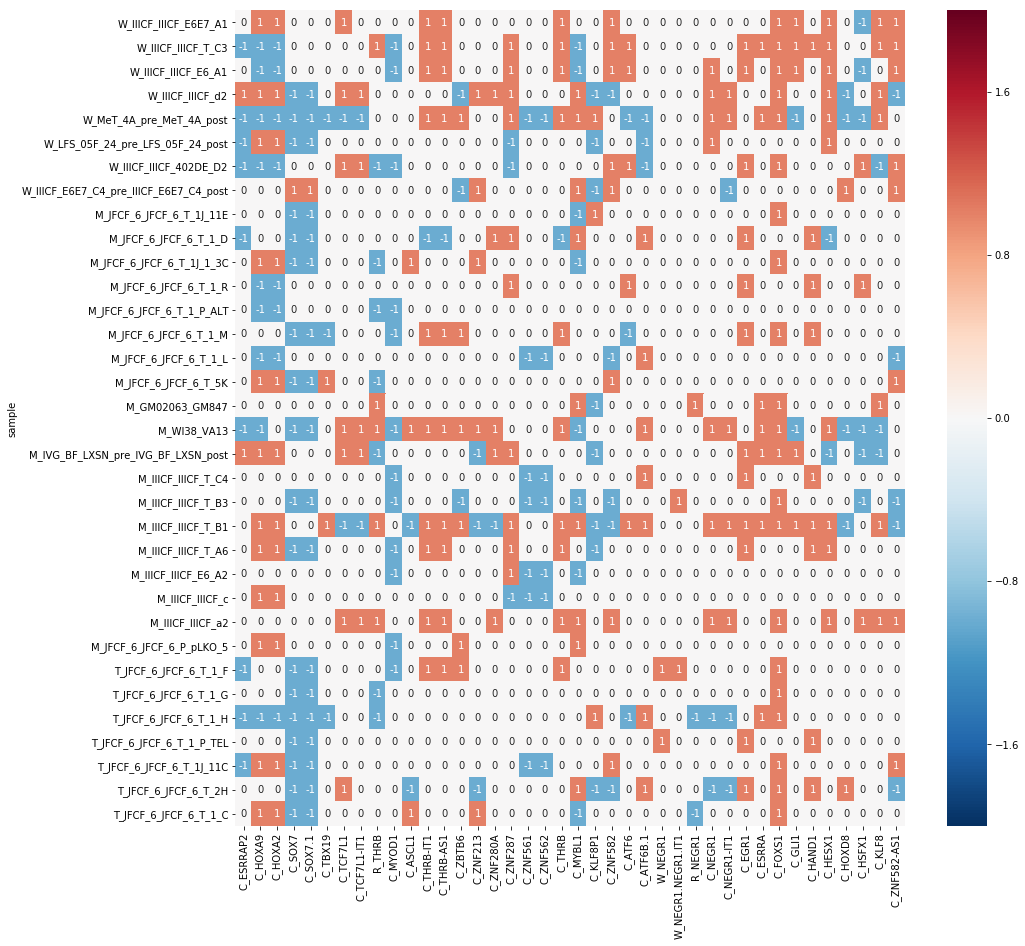

In [50]:
by_class = df
by_class['class'] = y
by_class = by_class.sort_values(by=['class'])
by_class['class'] = by_class['class'].map(lambda x:labels[x])
by_class = by_class.reset_index()
by_class['sample'] = by_class.apply(lambda row:row['class']+'_'+row['sample'], axis=1)
by_class = by_class.drop(['class'], axis=1)
by_class = by_class.set_index('sample')
col_d = dict(zip(range(len(by_class.columns)), by_class.columns))
clustering = SpectralBiclustering(n_clusters=2,method='log').fit(by_class)
fit_data = by_class.loc[:, [col_d[i] for i in np.argsort(clustering.column_labels_)]]
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.heatmap(fit_data, annot=True, cmap='RdBu_r', vmax=2, vmin= -2)